In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l
import random

In [2]:
def f_2d(x1, x2):
    # Quadratic Math Equation
    # Derivative is 0.2x1 + 4x2
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

epoch 20, x1: -0.531869, x2: 0.477091


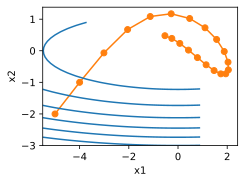

In [47]:
def get_adam(lr):
    v1 = 0
    v2 = 0
    t = 1
    learning_rate = lr
    def adam(x1, x2, s1, s2):
        nonlocal v1, v2, t, learning_rate
        beta1, beta2, eps = 0.9, 0.999, 1e-6

        # g1 and g2 are calculated gradients based on derivative of f_2d
        g1, g2 = 0.2 * x1, 4 * x2

        ## Calculate leaky momentum
        v1 = beta1 * v1 + (1 - beta1) * g1
        v2 = beta1 * v2 + (1 - beta1) * g2
        # Normalize so we don't have very small values at init when gradients are low
        v1_norm = v1 / (1 - beta1**t)
        v2_norm = v2 / (1 - beta1**t)

        ## Calculate leaky second moment (variance of gradient)
        s1 = beta2 * s1 + (1 - beta2) * (g1**2)
        s2 = beta2 * s2 + (1 - beta2) * (g2**2)

        ## Normalize so we don't have very small values at init when gradients are low
        ## Second moment far smaller than first so beta2 should be > beta1
        s1_norm = s1 / (1 - beta2**t)
        s2_norm = s2 / (1 - beta2**t)

        ## The updates are the essentially gradient momemtum / gradient variance momentum. This makes sense - if the variance is very high
        ## training is unstable and we don't want large updates. Momentum helps us get out of local minima.
        sg1 = learning_rate * v1_norm / (math.sqrt(s1_norm) + eps)
        sg2 = learning_rate * v2_norm / (math.sqrt(s2_norm) + eps)

        x1 -= sg1
        x2 -= sg2
        
        t+=1
        return x1, x2, s1, s2
    return adam
d2l.show_trace_2d(f_2d, d2l.train_2d(get_adam(1)))

epoch 1000, x1: -0.135331, x2: -0.000000


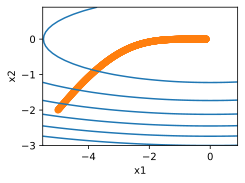

In [48]:
d2l.show_trace_2d(f_2d, d2l.train_2d(get_adam(0.01), steps=1000))